## Food Delivery Time Prediction
Training a Machine Learning model using an LSTM neural network for the task of food delivery time prediction

In [3]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
df=pd.read_csv('deliverytime.txt')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
...,...,...,...,...,...,...,...,...,...,...,...
45588,7C09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Meal,motorcycle,32
45589,D641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Buffet,motorcycle,36
45590,4F8D,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Drinks,scooter,16
45591,5EEE,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Snack,motorcycle,26


In [5]:
df.shape

(45593, 11)

In [6]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

In [7]:
df.nunique()

ID                             45451
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Type_of_order                      4
Type_of_vehicle                    4
Time_taken(min)                   45
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [9]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

In [10]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [11]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


Calculating Distance Between Two Latitudes and Longitudes Using Haversine Formula

In [12]:
# Set the earth's radius (in kilometers)
R = 6371

In [13]:
# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

In [14]:
# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

In [15]:
# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'],
                                          df.loc[i, 'Restaurant_longitude'],
                                          df.loc[i, 'Delivery_location_latitude'],
                                          df.loc[i, 'Delivery_location_longitude'])

In [16]:
df.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138
5,9BB4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,26,4.610365
6,95B4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,Meal,scooter,40,16.600361
7,9EB2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,32,20.205253
8,1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,Buffet,motorcycle,34,19.975520
9,CDCD,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,Snack,motorcycle,46,10.280582


### Exploratory Data Analysis

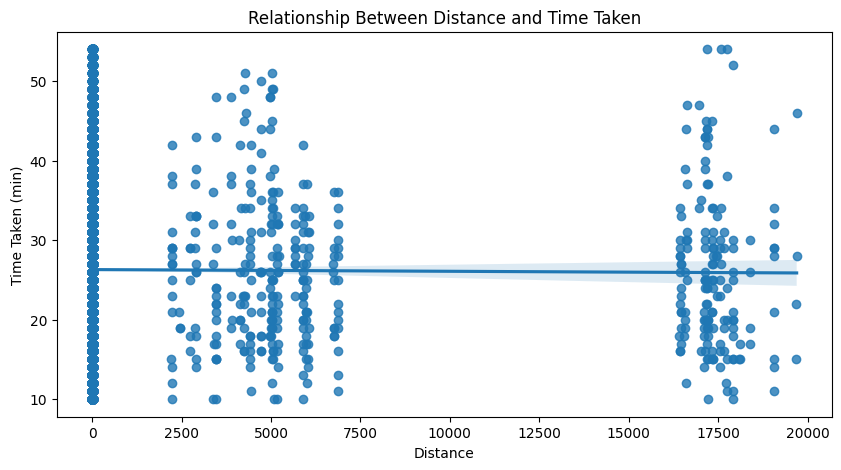

In [17]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='distance', y='Time_taken(min)')

plt.title('Relationship Between Distance and Time Taken')
plt.xlabel('Distance')
plt.ylabel('Time Taken (min)')
plt.show()

It means that most delivery partners deliver food within 25-30 minutes, regardless of distance.

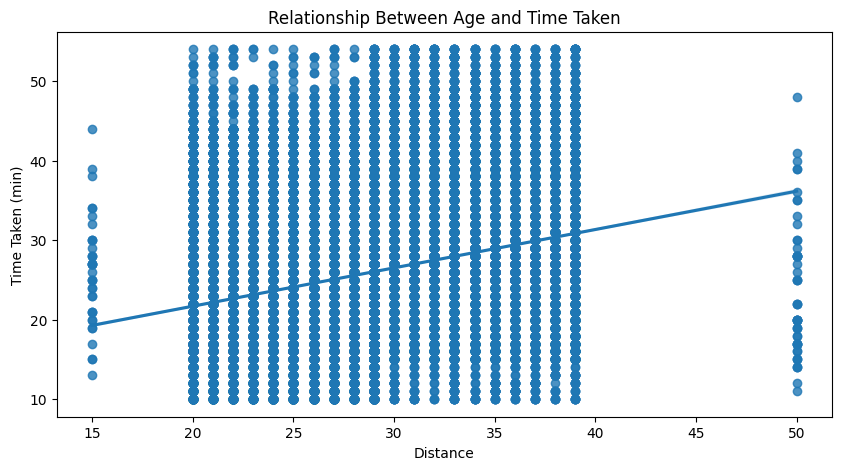

In [18]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='Delivery_person_Age', y='Time_taken(min)')

plt.title('Relationship Between Age and Time Taken')
plt.xlabel('Distance')
plt.ylabel('Time Taken (min)')
plt.show()

It means young delivery partners take less time to deliver the food compared to the elder partners.

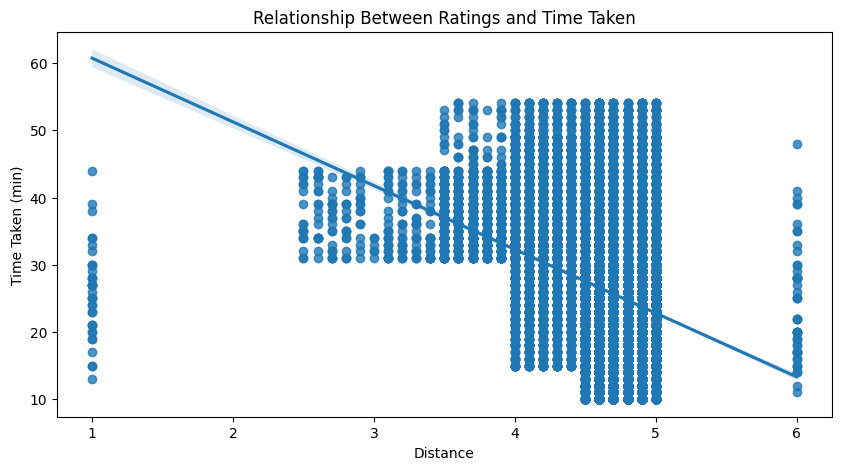

In [19]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='Delivery_person_Ratings', y='Time_taken(min)')

plt.title('Relationship Between Ratings and Time Taken')
plt.xlabel('Distance')
plt.ylabel('Time Taken (min)')
plt.show()

It means delivery partners with higher ratings take less time to deliver the food compared to partners with low ratings

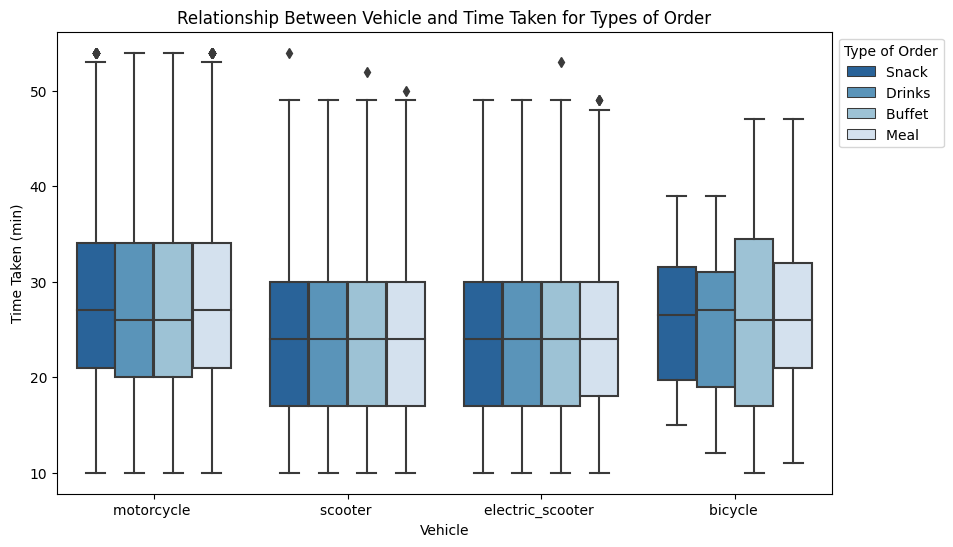

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Type_of_vehicle', y='Time_taken(min)', hue='Type_of_order', palette='Blues_r')

plt.title('Relationship Between Vehicle and Time Taken for Types of Order')
plt.xlabel('Vehicle')
plt.ylabel('Time Taken (min)')
plt.legend(title='Type of Order', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

There is not much difference between the time taken by delivery partners depending on the vehicle they are driving and the type of food they are delivering.

So the features that contribute most to the delivery time based on above analysis are :

- age of the delivery partner
- ratings of the delivery partner
- distance between the restaurant and the delivery location

#### Food Delivery Time Prediction Model


In [21]:
X = np.array(df[["Delivery_person_Age",
                   "Delivery_person_Ratings",
                   "distance"]])

In [22]:
y = np.array(df[["Time_taken(min)"]])

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (Xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# training the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(Xtrain, ytrain, batch_size=1, epochs=9)

Epoch 1/9
36474/36474 [==============================] - 184s 5ms/step - loss: 69.3161
Epoch 2/9
36474/36474 [==============================] - 178s 5ms/step - loss: 64.4415
Epoch 3/9
36474/36474 [==============================] - 177s 5ms/step - loss: 61.8922
Epoch 4/9
36474/36474 [==============================] - 178s 5ms/step - loss: 60.5917
Epoch 5/9
36474/36474 [==============================] - 178s 5ms/step - loss: 60.0933
Epoch 6/9
36474/36474 [==============================] - 179s 5ms/step - loss: 59.6969
Epoch 7/9
36474/36474 [==============================] - 178s 5ms/step - loss: 59.9495
Epoch 8/9
36474/36474 [==============================] - 177s 5ms/step - loss: 59.2362
Epoch 9/9
36474/36474 [==============================] - 178s 5ms/step - loss: 59.1758


In [27]:
# testing the performance of model
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))

Food Delivery Time Prediction
Age of Delivery Partner: 32
Ratings of Previous Deliveries: 3.8
Total Distance: 12


In [28]:
features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

1/1 [==============================] - 1s 666ms/step
Predicted Delivery Time in Minutes =  [[36.034153]]


- To predict the food delivery time in real time, you need to calculate the distance between the food preparation point and the point of food consumption.
- After finding the distance between the restaurant and the delivery locations, you need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.